# Exploratory Data Analysis

The broader goal of this project is to predict future prices with reasonable accuracy. But first, let's get a feel for the data we're working with.

A bulk of this exploratory work happens in Pandas because it's very good at this sort of thing.

In [10]:
import pandas as pd

import statsmodels.formula.api as smf

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (20.0, 7.5)
matplotlib.rcParams['font.size'] = 16
matplotlib.pyplot.style.use('ggplot')

## Loading the data

In [2]:
property_transactions = pd.read_csv('../../data/pp-complete.csv',
                                          header=None,
                                          names=[
                                              'transaction_id',
                                              'transaction_price',
                                              'transaction_transfer_date',
                                              'property_postcode',
                                              'property_type',
                                              'property_age',
                                              'property_duration',
                                              'property_paon',
                                              'property_saon',
                                              'property_street',
                                              'property_locality',
                                              'property_town_or_city',
                                              'property_district',
                                              'property_county',
                                              'transaction_category',
                                              '_record_type'
                                          ],
                                          parse_dates=['transaction_transfer_date']
                                   ).fillna('')

In [3]:
property_transactions

,transaction_id,transaction_price,transaction_transfer_date,property_postcode,property_type,property_age,property_duration,property_paon,property_saon,property_street,property_locality,property_town_or_city,property_district,property_county,transaction_category,_record_type
0,{5BBE9CB3-6332-4EB0-9CD3-8737CEA4A65A},42000,1995-12-21,NE4 9DN,S,N,F,8,,MATFEN PLACE,FENHAM,NEWCASTLE UPON TYNE,NEWCASTLE UPON TYNE,TYNE AND WEAR,A,A
1,{20E2441A-0F16-49AB-97D4-8737E62A5D93},95000,1995-03-03,RM16 4UR,S,N,F,30,,HEATH ROAD,GRAYS,GRAYS,THURROCK,THURROCK,A,A
2,{D893EE64-4464-44B5-B01B-8E62403ED83C},74950,1995-10-03,CW10 9ES,D,Y,F,15,,SHROPSHIRE CLOSE,MIDDLEWICH,MIDDLEWICH,CONGLETON,CHESHIRE,A,A
3,{F9F753A8-E56A-4ECC-9927-8E626A471A92},43500,1995-11-14,TS23 3LA,S,N,F,19,,SLEDMERE CLOSE,BILLINGHAM,BILLINGHAM,STOCKTON-ON-TEES,STOCKTON-ON-TEES,A,A
4,{E166398A-A19E-470E-BB5A-83B4C254CF6D},63000,1995-09-08,CA25 5QH,S,N,F,8,,CROSSINGS CLOSE,CLEATOR MOOR,CLEATOR MOOR,COPELAND,CUMBRIA,A,A
5,{A9A3C463-3CA0-4D71-8CF9-83B4D0536EEA},29995,1995-05-12,PE14 8JF,S,N,F,114,,SMEETH ROAD,ST JOHNS FEN END,WISBECH,KING'S LYNN AND WEST NORFOLK,NORFOLK,A,A
6,{8DE57D57-DDC3-4993-8C33-83B4E5BAA543},105000,1995-11-30,S6 6TG,D,N,F,70,,WOODSTOCK ROAD,LOXLEY,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,A,A
7,{568DE11A-432B-4DA3-B9A4-83B4EC4BD127},121250,1995-05-19,N12 8LR,F,N,L,CAVENDISH HOUSE,FLAT 20,WOODSIDE GRANGE ROAD,LONDON,LONDON,BARNET,GREATER LONDON,A,A
8,{F7A5CAE4-BDD3-4911-897C-8AC393B97281},43000,1995-12-01,LA6 3DQ,T,N,F,90,,NEW VILLAGE,INGLETON,CARNFORTH,CRAVEN,NORTH YORKSHIRE,A,A
9,{DED4E551-6B96-40FB-98E9-8AC3B9071356},128500,1995-03-01,SW18 5DH,T,N,F,149,,TRENTHAM STREET,LONDON,LONDON,WANDSWORTH,GREATER LONDON,A,A


The first thing we want to do is filter the transactions we're dealing with to only be include "single residential property sold for full market value." While this doesn't exclude many transactions (< 2%), it does remove ones that aren't fair to compare.

In [4]:
property_transactions = property_transactions[property_transactions['transaction_category'] == 'A']

Then, we take a look at the distribution of prices so that we spot any ridiculous outliers that we might want to get rid of. It's a good thing to do this to not skew any insights we gather later on.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ff31d30>]],
      dtype=object)

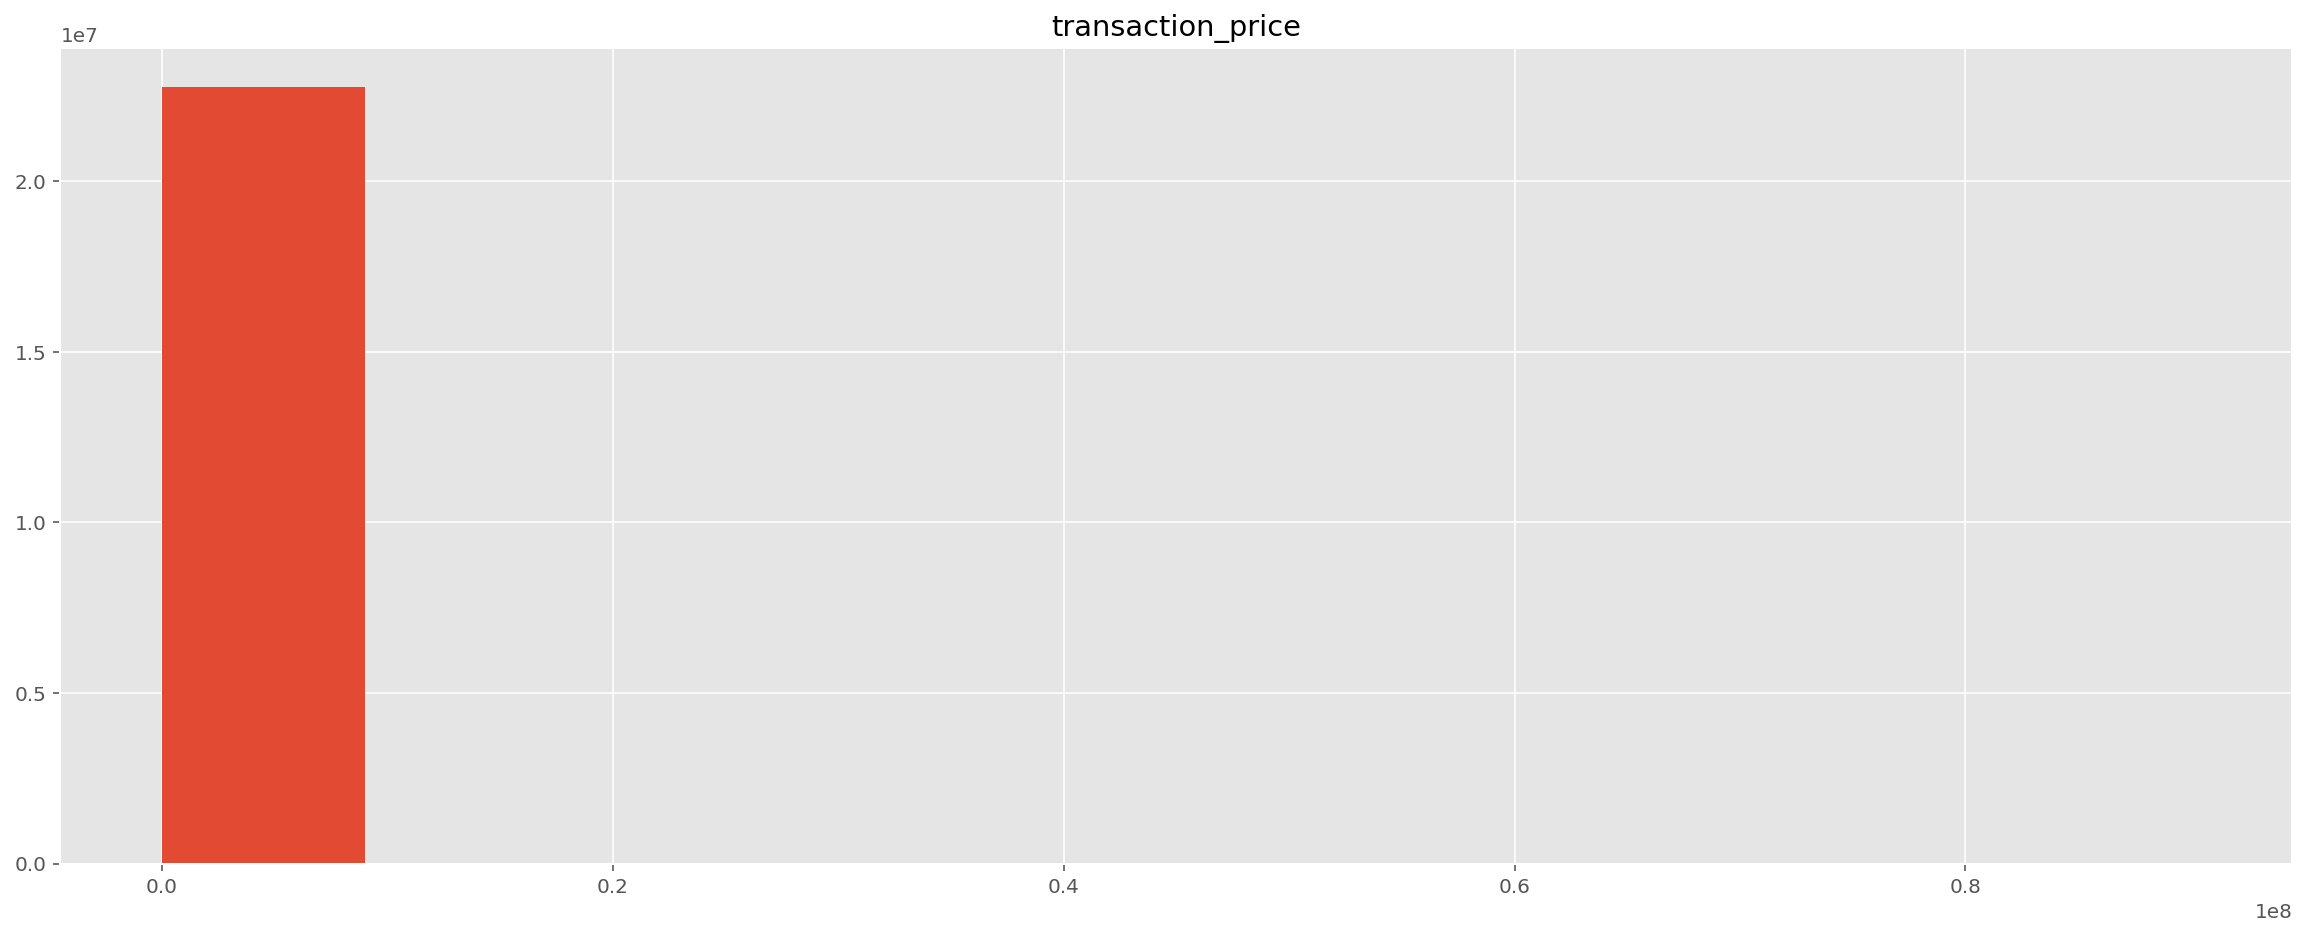

In [11]:
property_transactions.hist(column='transaction_price')

In [6]:
property_transactions.describe(percentiles=[0.001, 0.999])

,transaction_price
count,2.276446e+07
mean,1.763071e+05
std,2.088693e+05
min,1.000000e+00
0.1%,9.500000e+03
50%,1.325000e+05
99.9%,2.200000e+06
max,9.000000e+07


TODO: We could clip the outliers, but we're instead going to go with medians as the measure of central tendency.

## Aggregate trends

In [7]:
yearly_transactions = property_transactions.groupby(pd.Grouper(key='transaction_transfer_date', freq='Y'))

In [8]:
yearly_transactions_counts = yearly_transactions.agg({'transaction_id': ['count']})

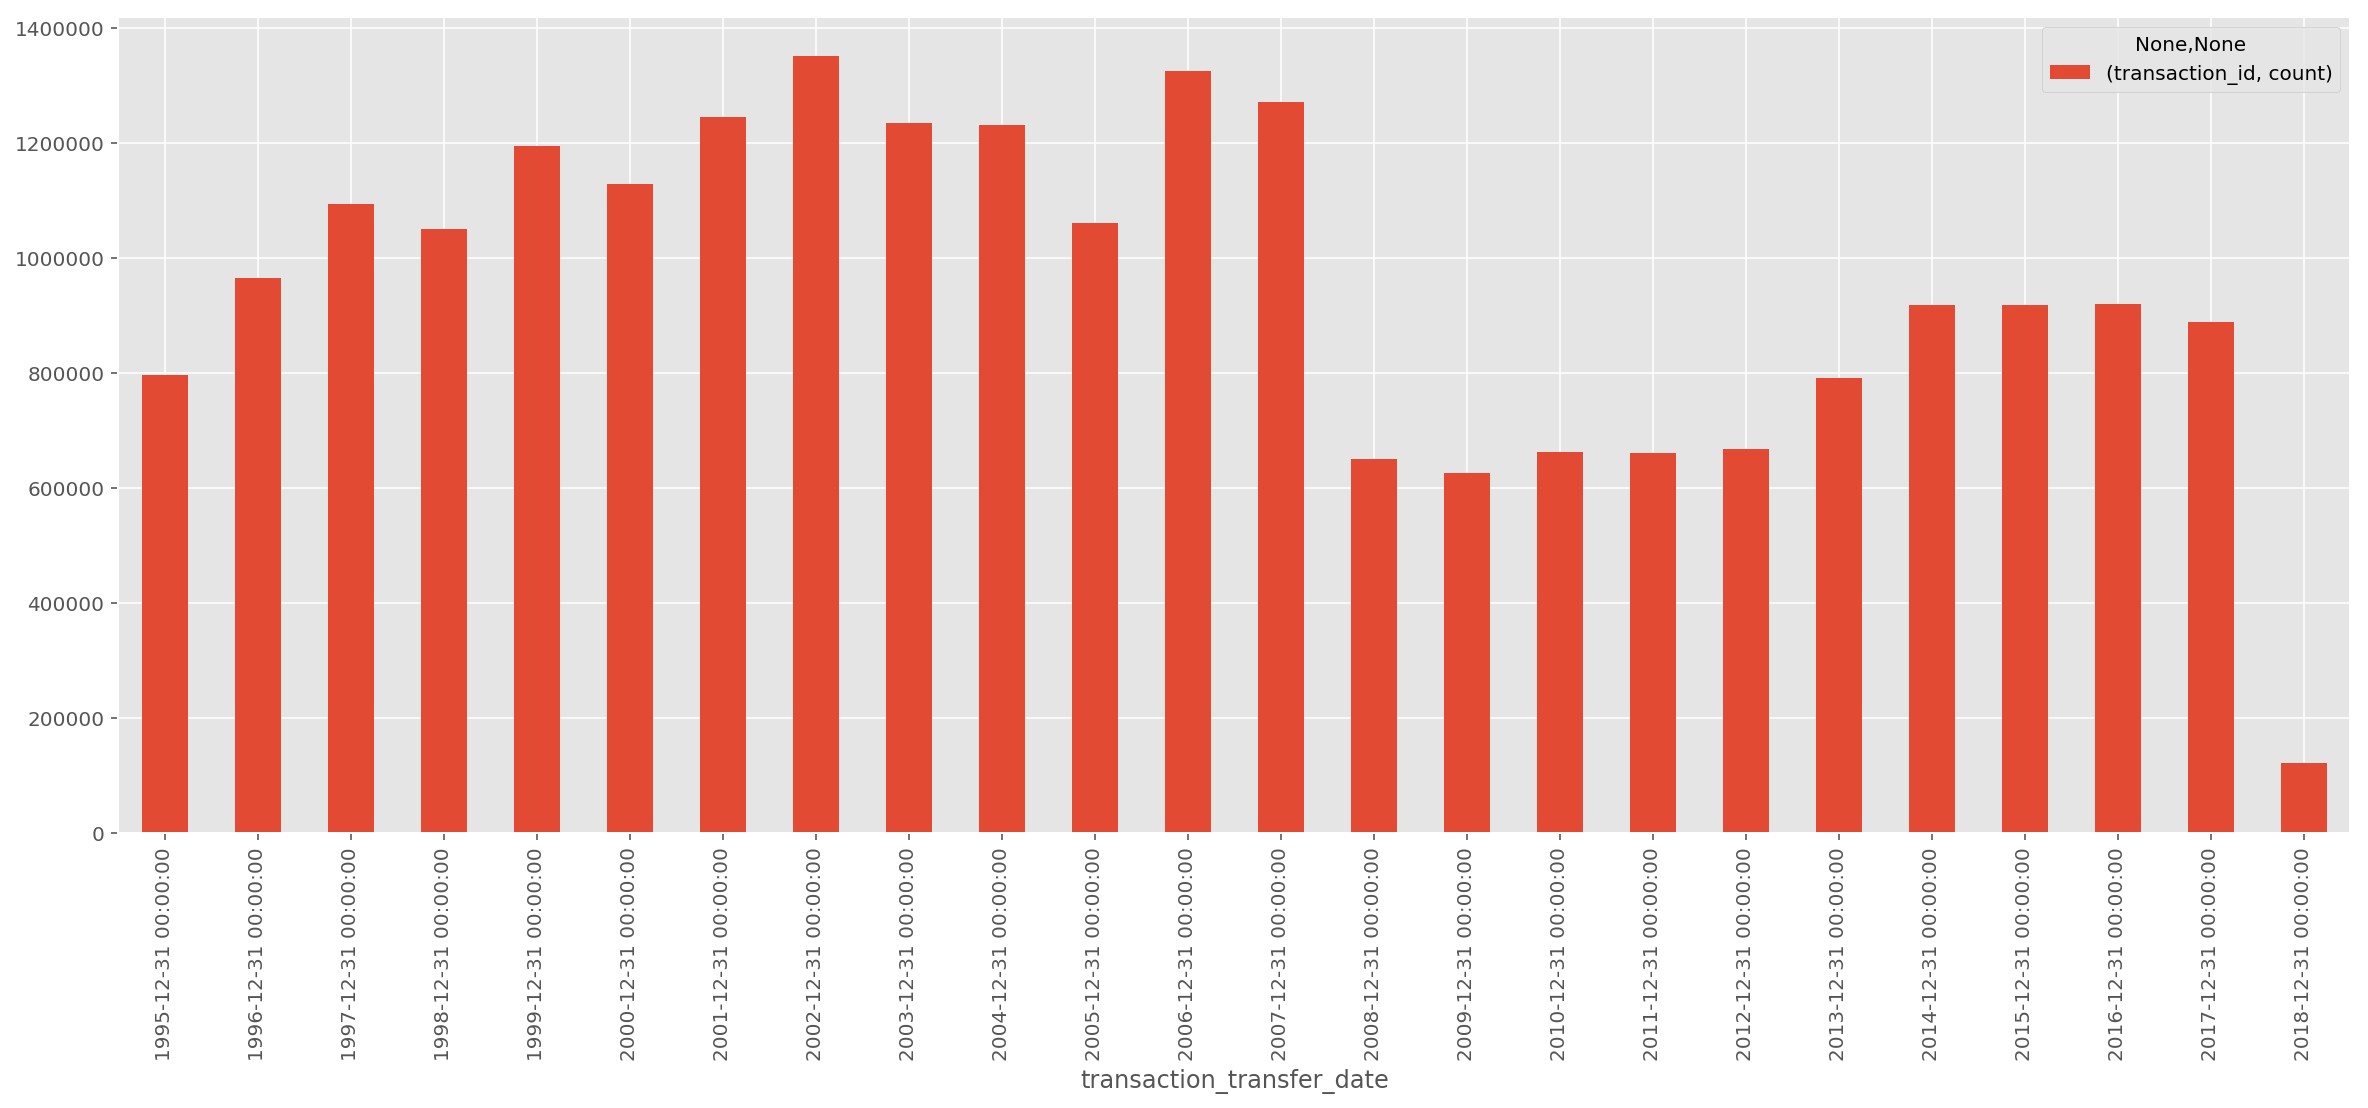

In [12]:
yearly_transactions_counts.plot.bar()

Clearly there was a big dip in number of properties sold after the 2007–2008 financial crisis, and it really hasn't fully recovered since.

In [13]:
yearly_transactions_split = property_transactions.groupby([pd.Grouper(key='transaction_transfer_date', freq='Y'), 'property_type'])

In [14]:
yearly_transactions_split_counts = yearly_transactions_split.agg({'transaction_id': ['count']})

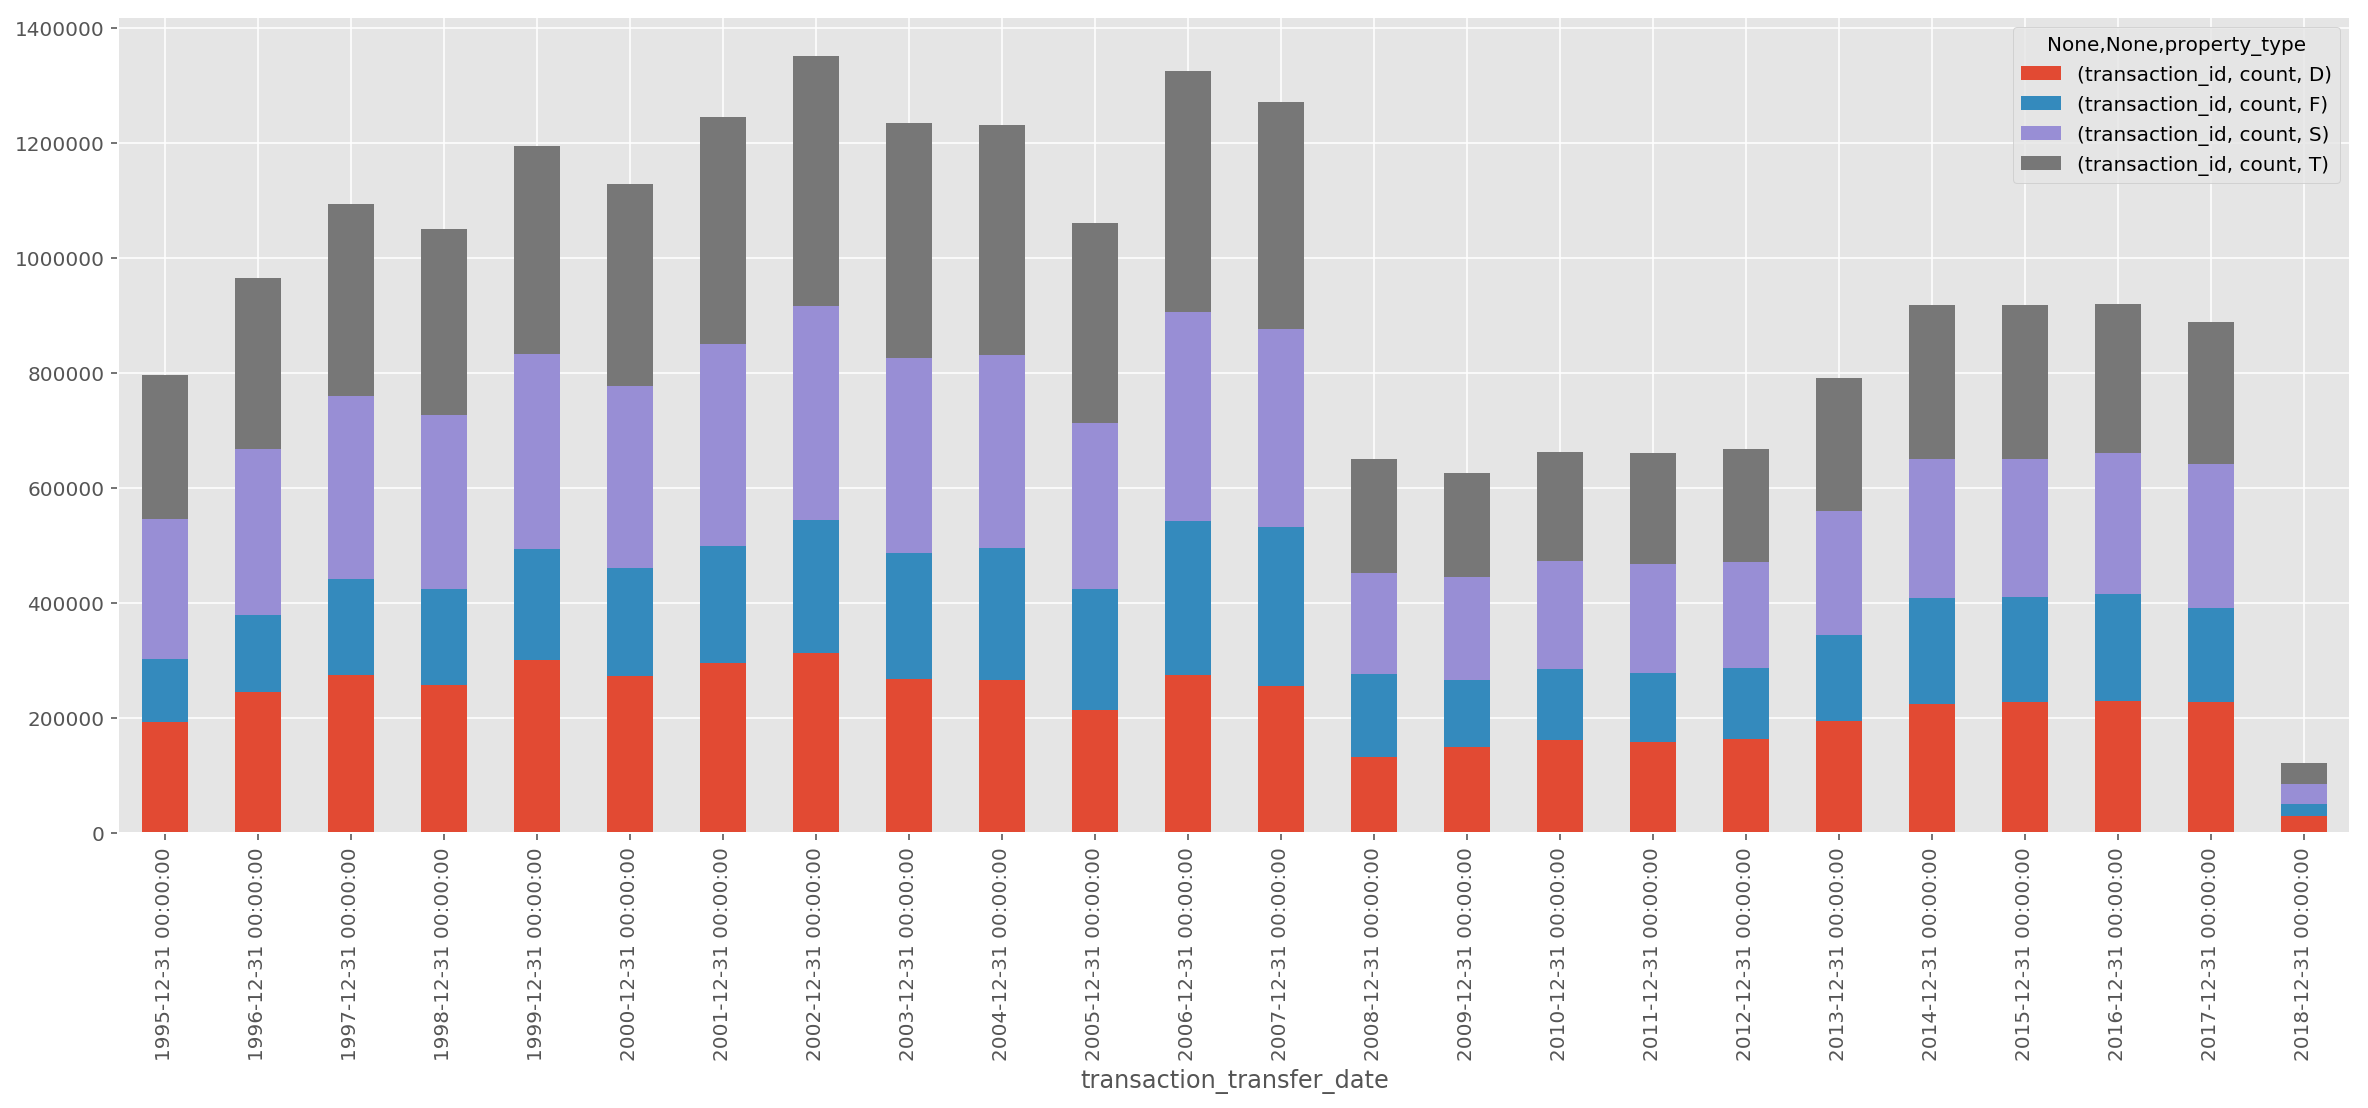

In [15]:
yearly_transactions_split_counts.unstack('property_type').plot.bar(stacked=True)

In [87]:
monthly_prices = property_transactions.groupby(pd.Grouper(key='transaction_transfer_date', freq='M'))

In [88]:
monthly_prices_medians = monthly_prices.agg({'transaction_price': ['median']})

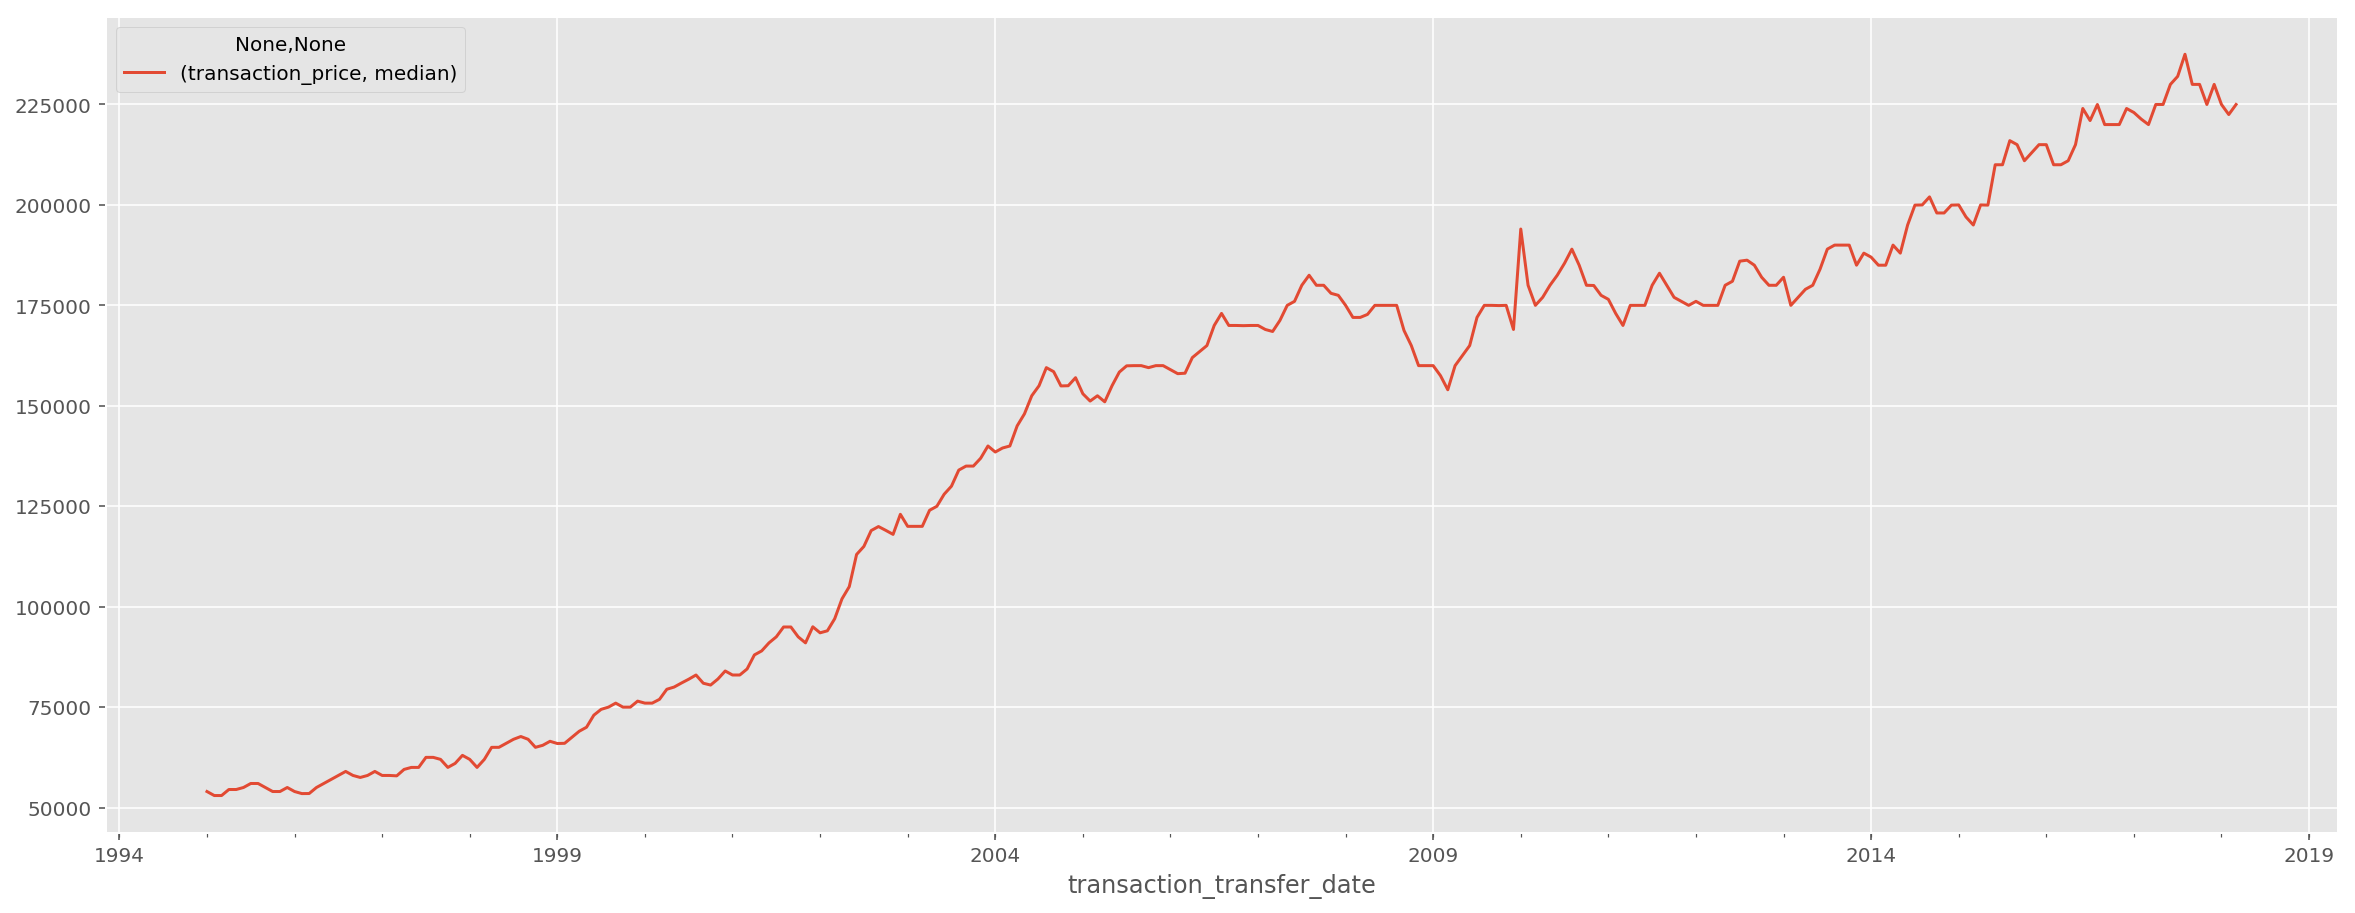

In [89]:
monthly_prices_medians.plot()

In [19]:
monthly_prices_split = property_transactions.groupby([pd.Grouper(key='transaction_transfer_date', freq='M'), 'property_type'])

In [20]:
monthly_prices_split_medians = monthly_prices_split.agg({'transaction_price': ['median']})

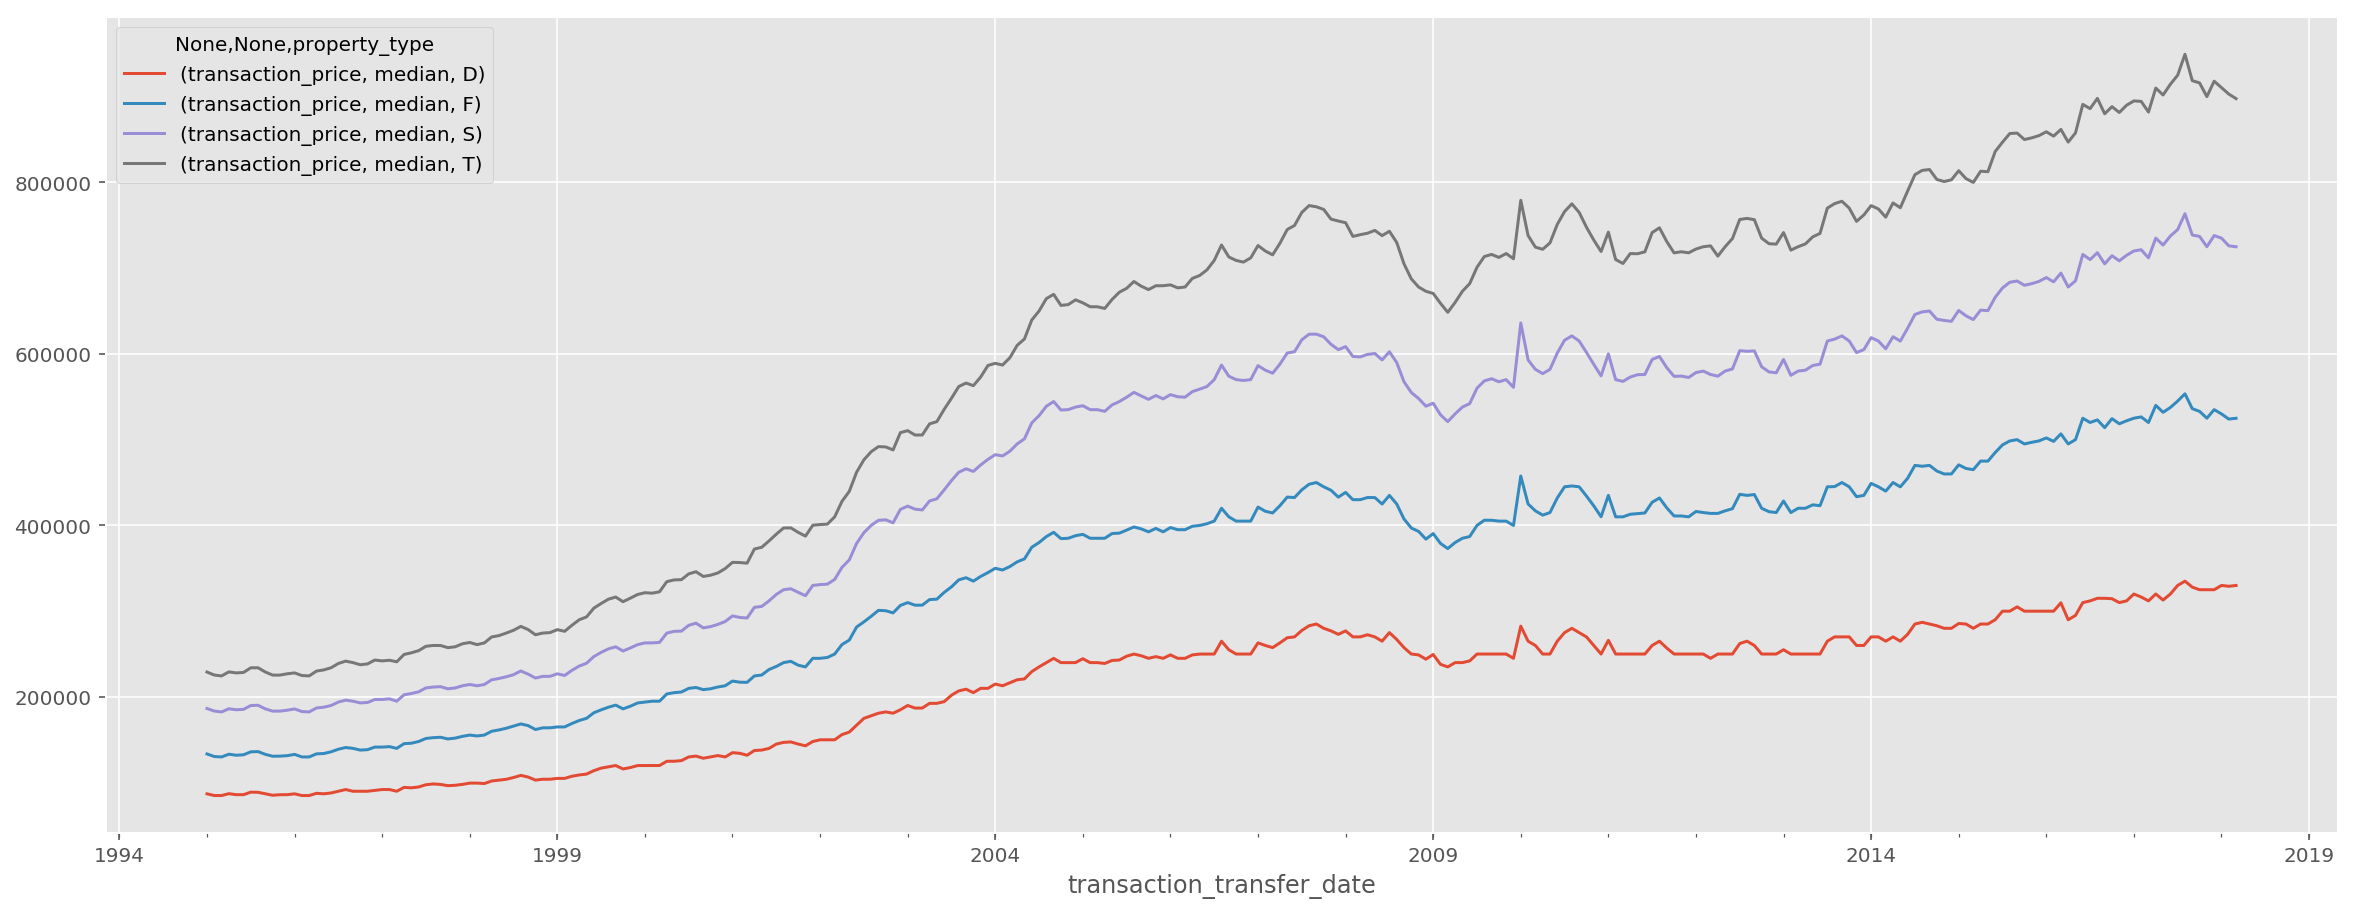

In [21]:
monthly_prices_split_medians.unstack('property_type').plot(stacked=True)

## Localised trends

While global trends are interesting, the thing we're really interested in is local trends. How have different parts of London been doing, and what's the outlook for them?

In [22]:
postcode_locations = pd.read_csv('../../data/NSPL_FEB_2018_UK.csv').set_index('pcds')
postcode_locations.head()

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,pcd,pcd2,dointr,doterm,usertype,oseast1m,osnrth1m,osgrdind,oa11,cty,...,bua11,buasd11,ru11ind,oac11,lat,long,lep1,lep2,pfa,imd
pcds,,,,,,,,,,,,,,,,,,,,,
AB1 0AA,AB1 0AA,AB1 0AA,198001,199606.0,0,385386.0,801193.0,1,S00090303,S99999999,...,S99999999,S99999999,3,1C3,57.101474,-2.242851,S99999999,S99999999,S23000009,6808
AB1 0AB,AB1 0AB,AB1 0AB,198001,199606.0,0,385177.0,801314.0,1,S00090303,S99999999,...,S99999999,S99999999,3,1C3,57.102554,-2.246308,S99999999,S99999999,S23000009,6808
AB1 0AD,AB1 0AD,AB1 0AD,198001,199606.0,0,385053.0,801092.0,1,S00090399,S99999999,...,S99999999,S99999999,3,6A1,57.100556,-2.248342,S99999999,S99999999,S23000009,6808
AB1 0AE,AB1 0AE,AB1 0AE,199402,199606.0,0,384600.0,799300.0,8,S00091322,S99999999,...,S99999999,S99999999,6,1A2,57.084444,-2.255708,S99999999,S99999999,S23000009,5503
AB1 0AF,AB1 0AF,AB1 0AF,199012,199207.0,1,384460.0,800660.0,8,S00090299,S99999999,...,S99999999,S99999999,3,6A4,57.096656,-2.258102,S99999999,S99999999,S23000009,6668


In [23]:
wards = pd.read_csv('../../data/Ward names and codes UK as at 12_17.txt', sep='\t', encoding='latin-1').set_index('WD17CD')
wards.head()

,WD17NM,WD17NMW
WD17CD,,
E05000026,Abbey,NaN
E05000027,Alibon,NaN
E05000028,Becontree,NaN
E05000029,Chadwell Heath,NaN
E05000030,Eastbrook,NaN


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


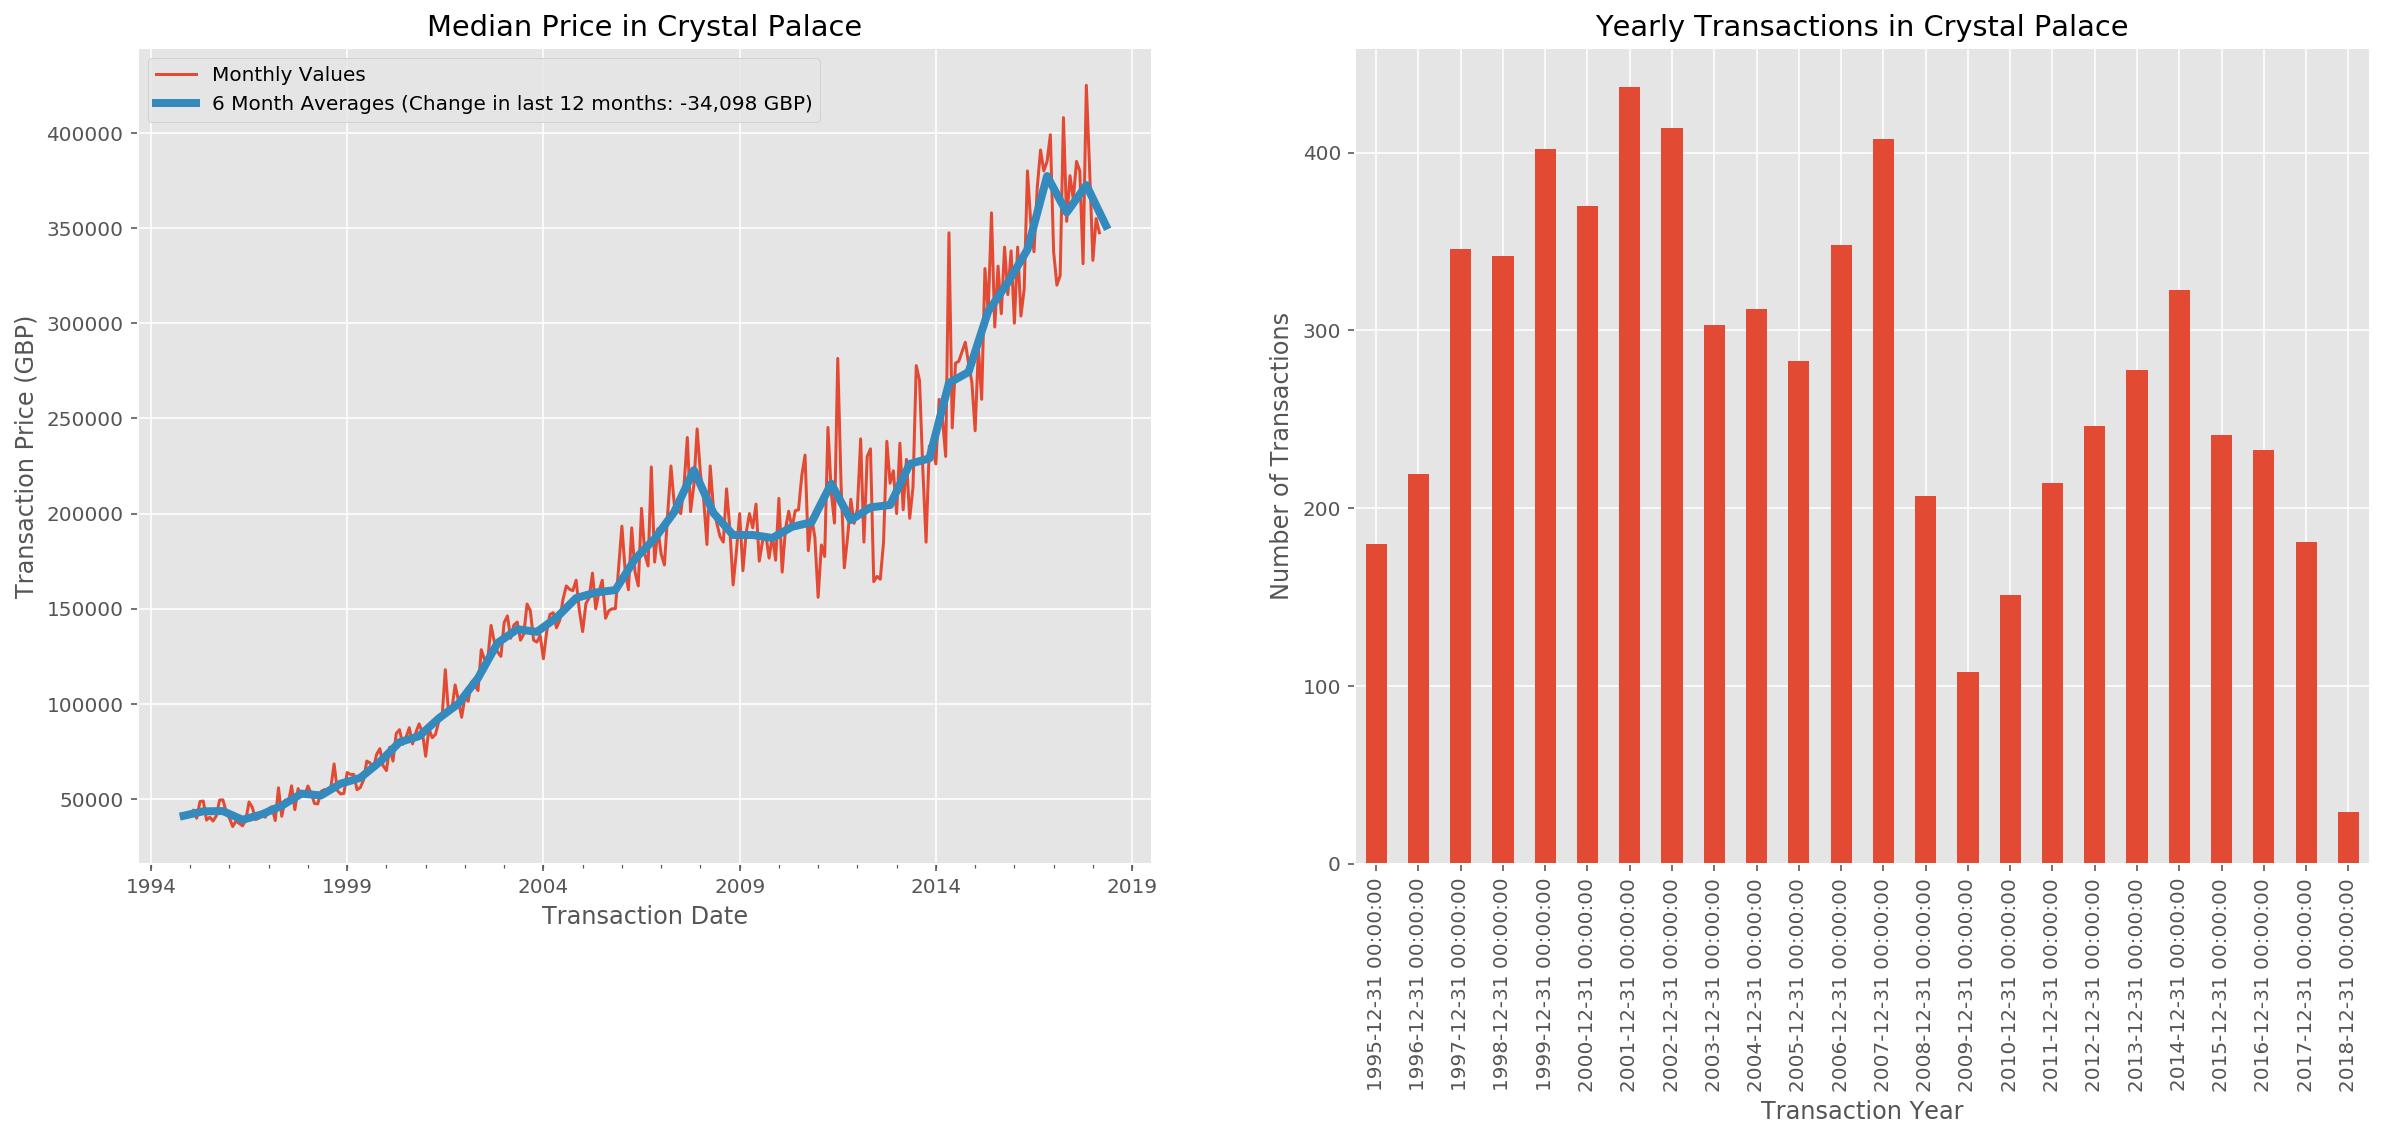

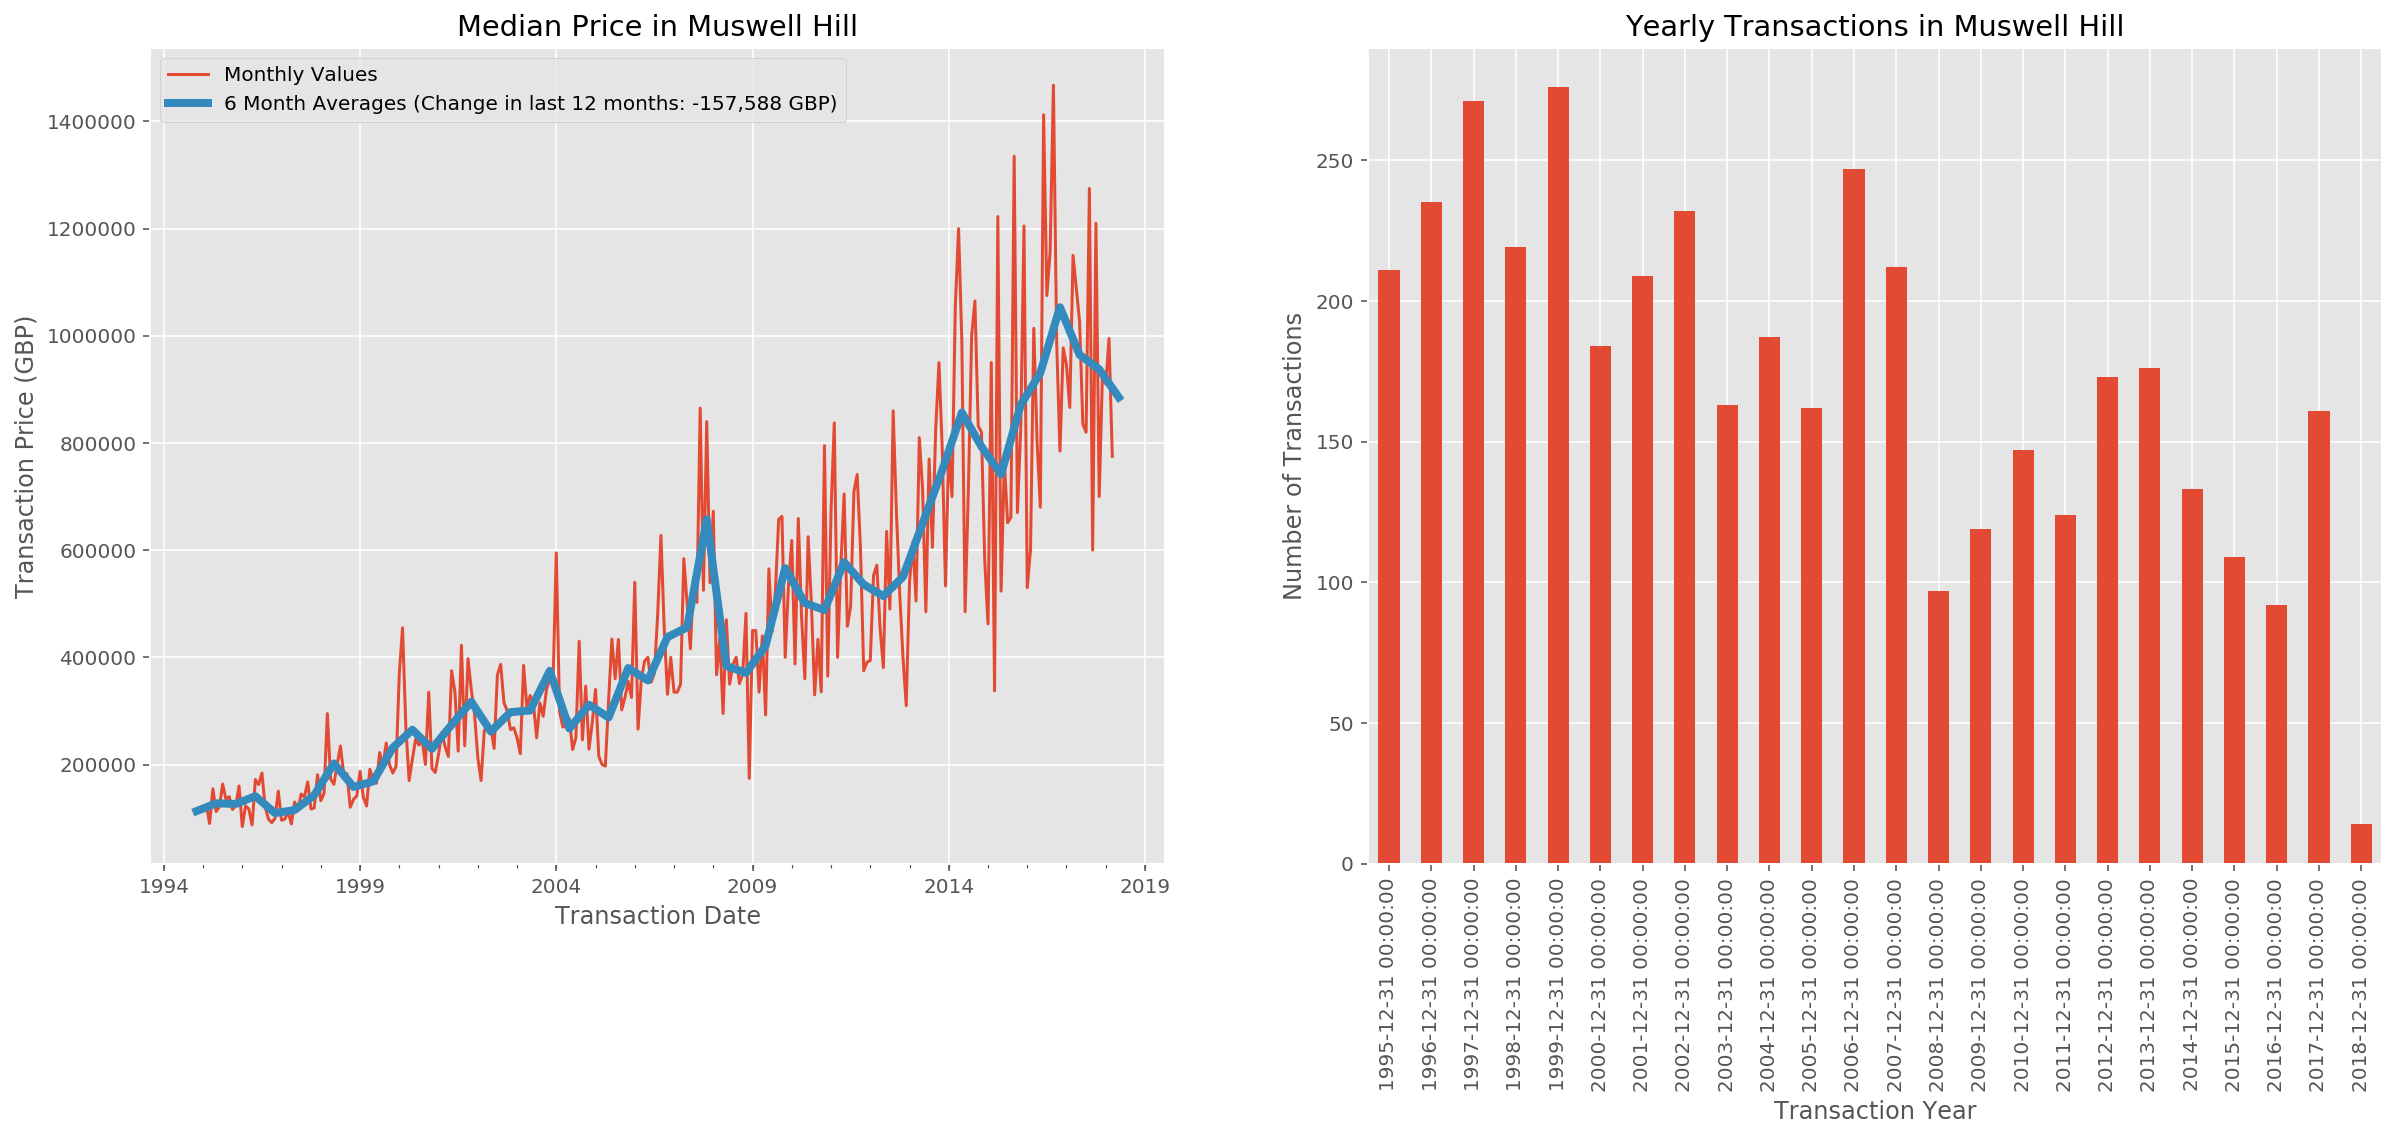

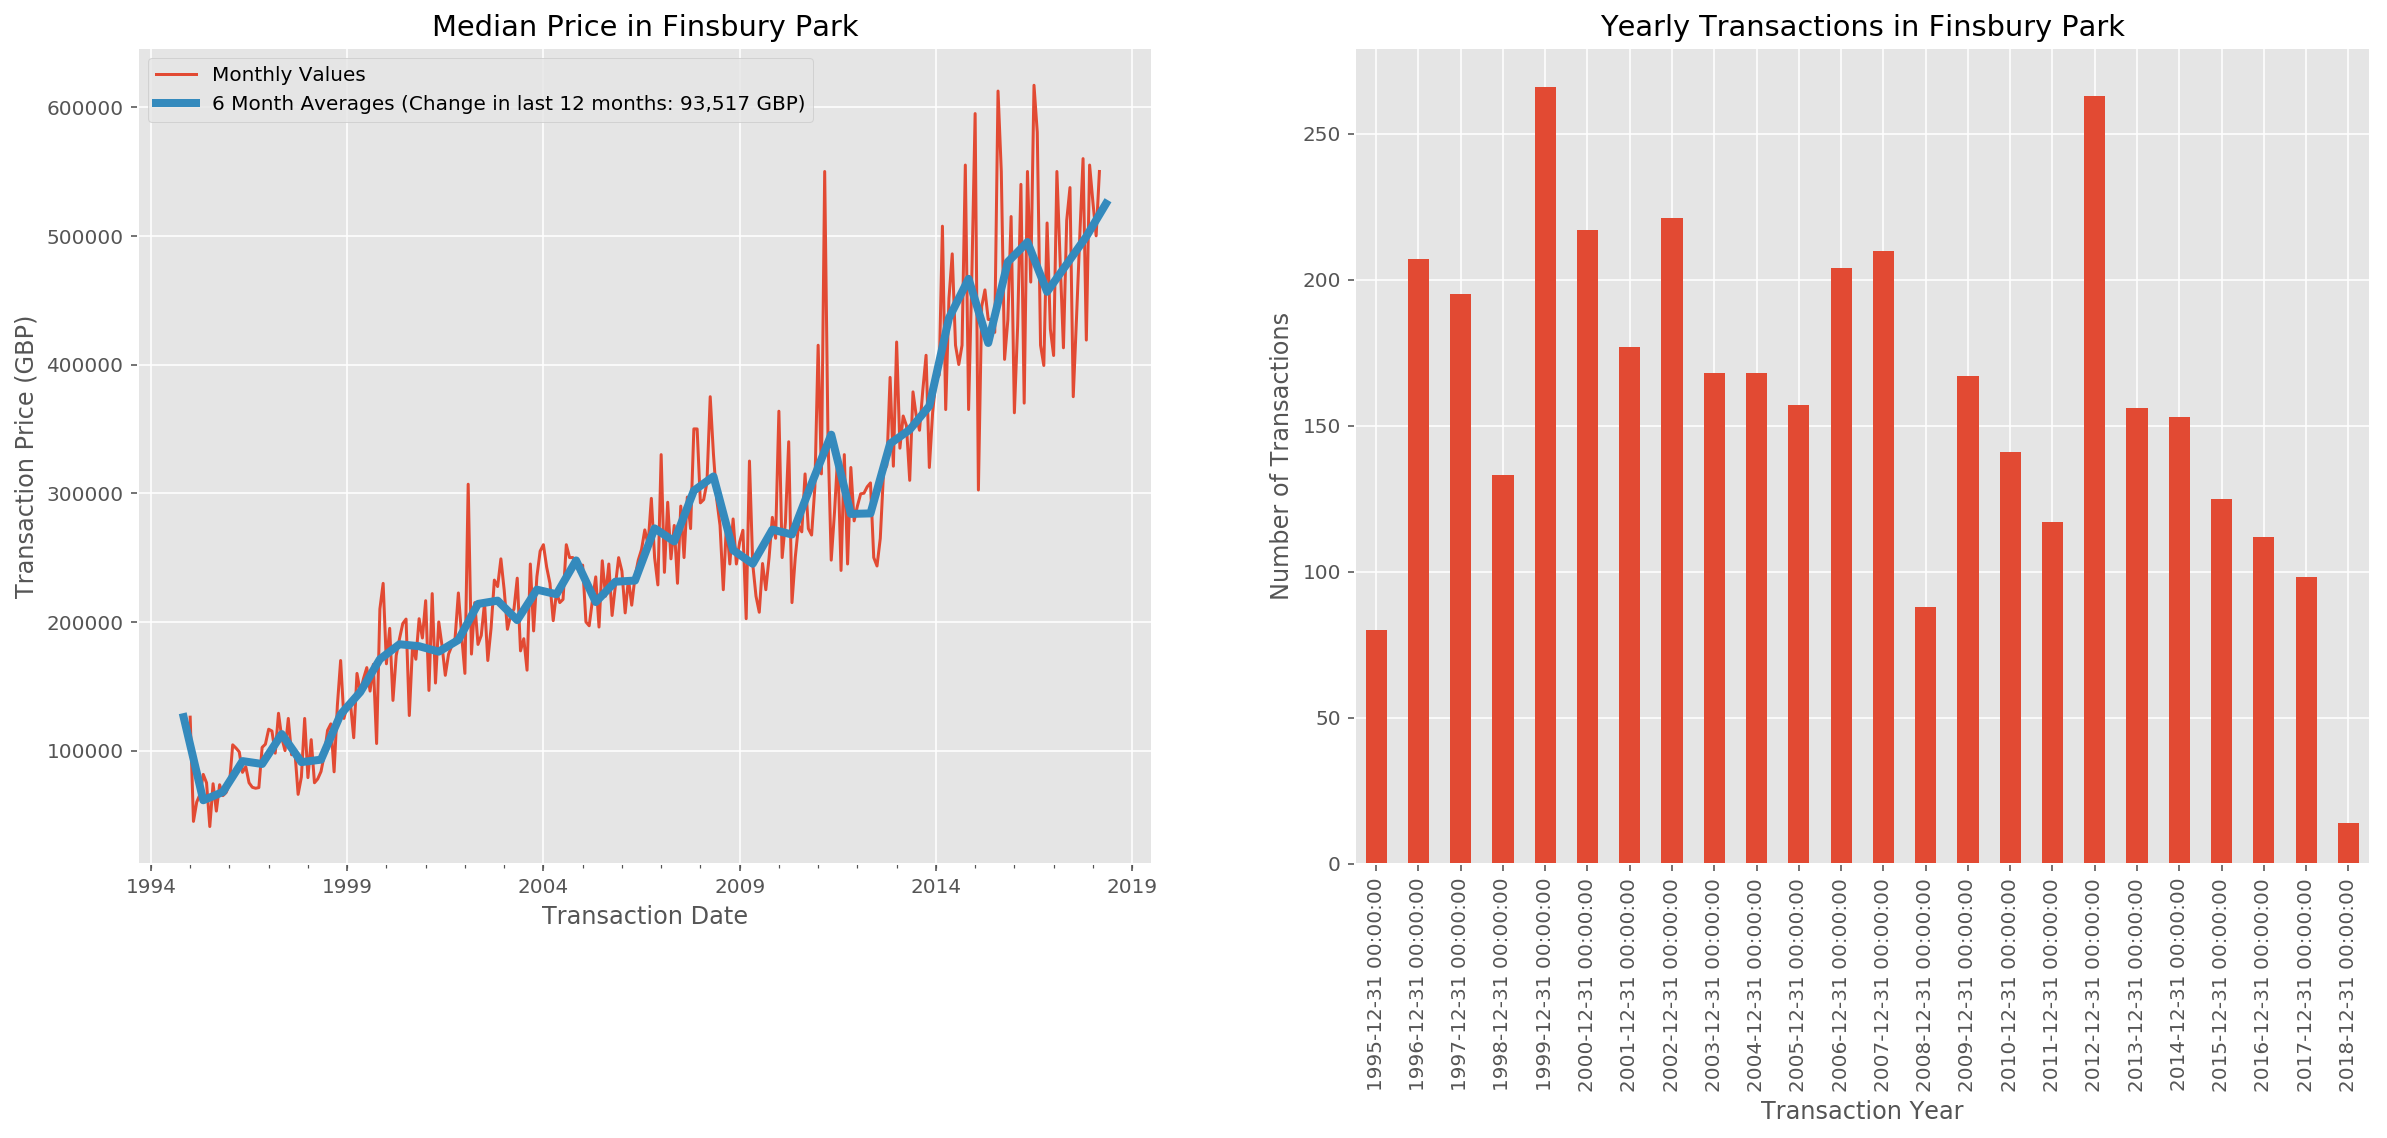

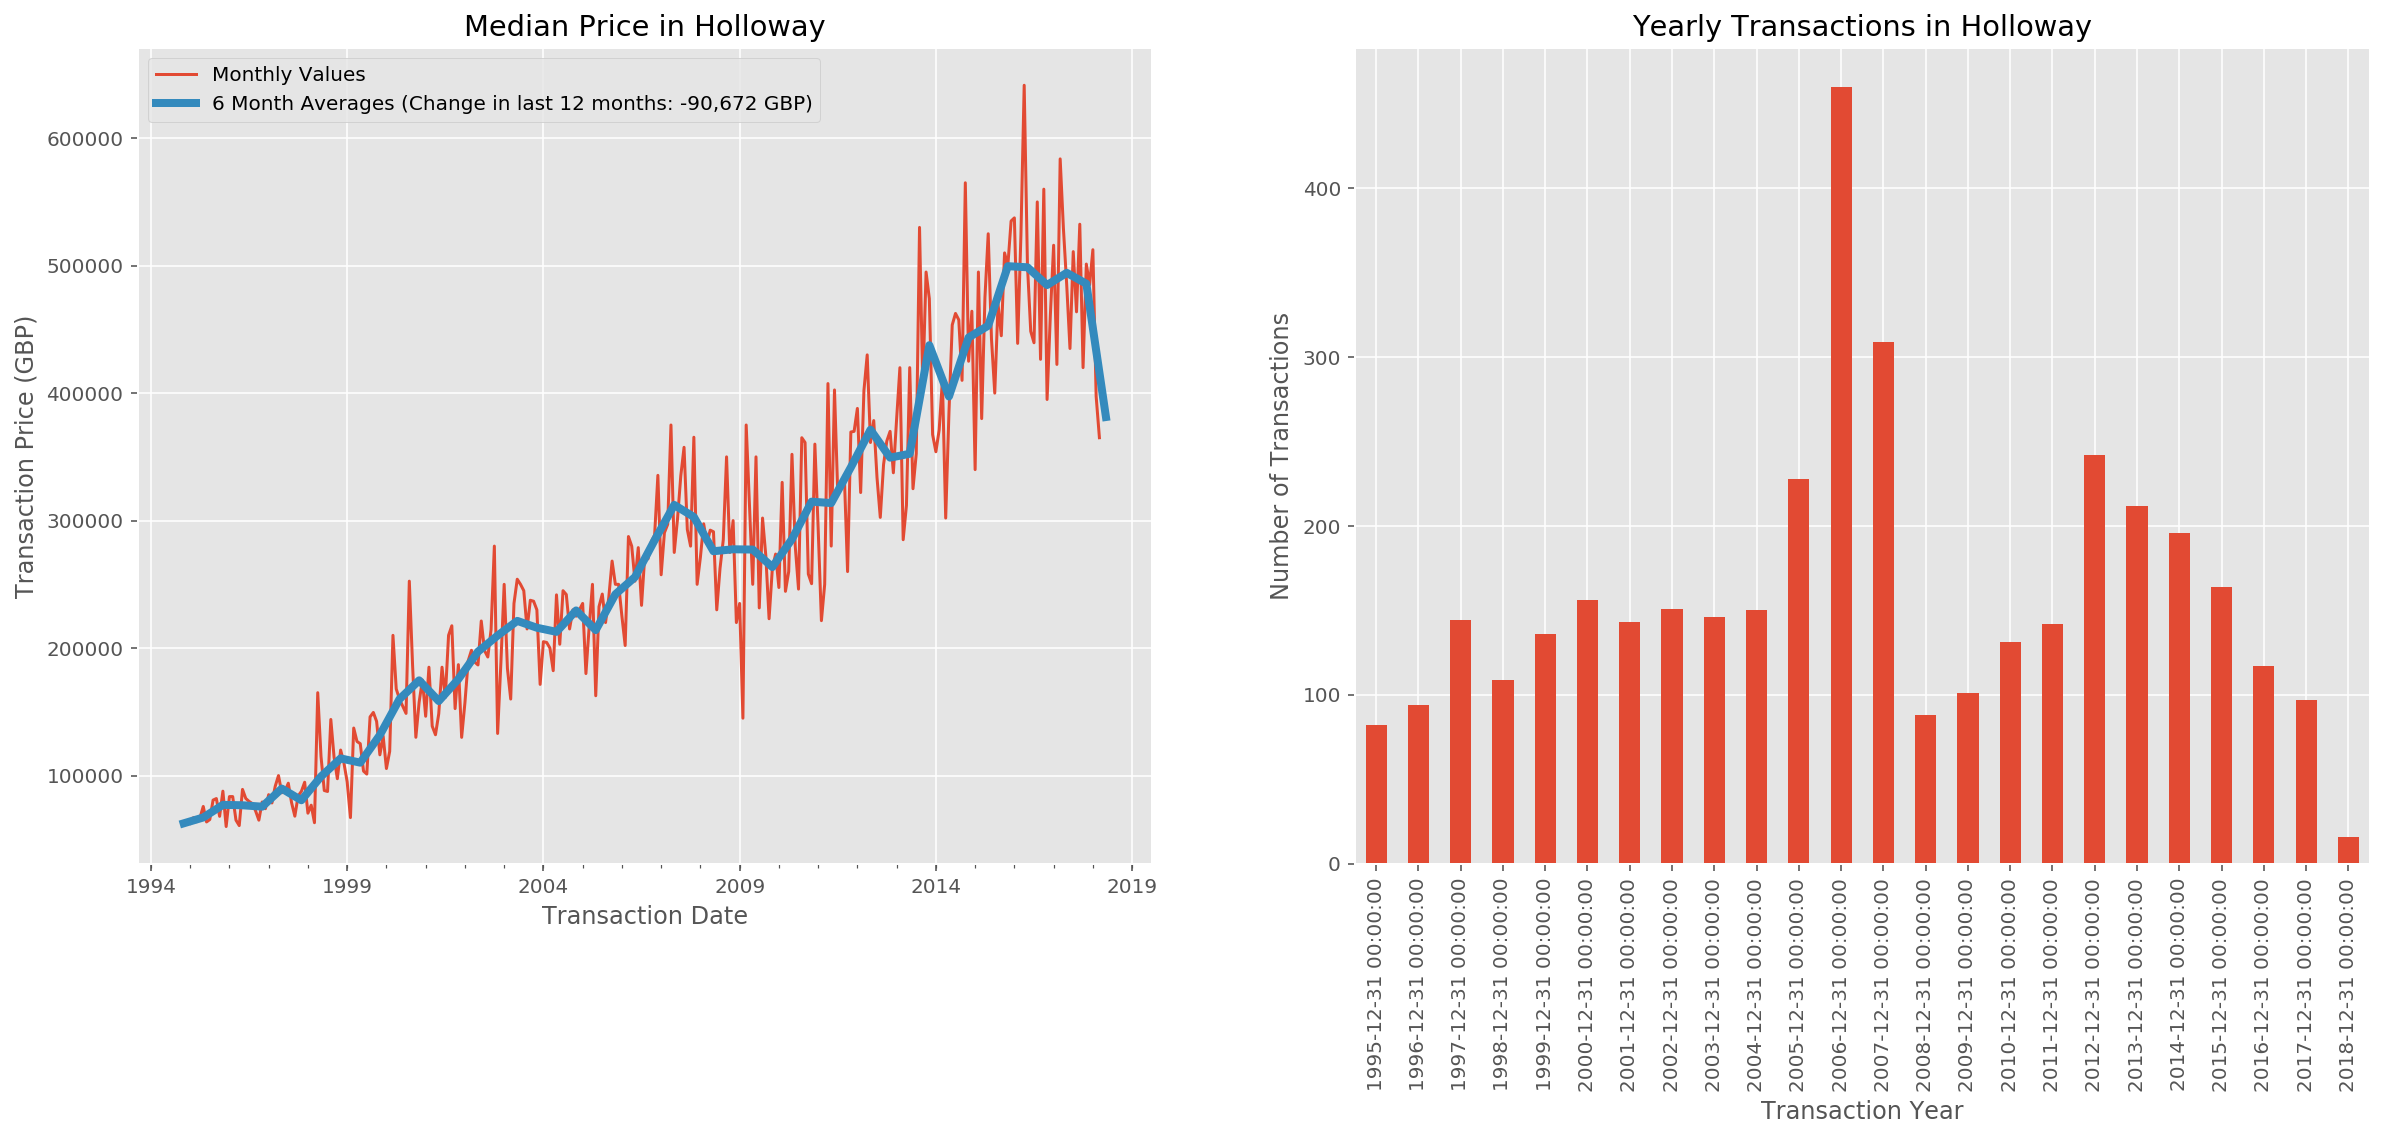

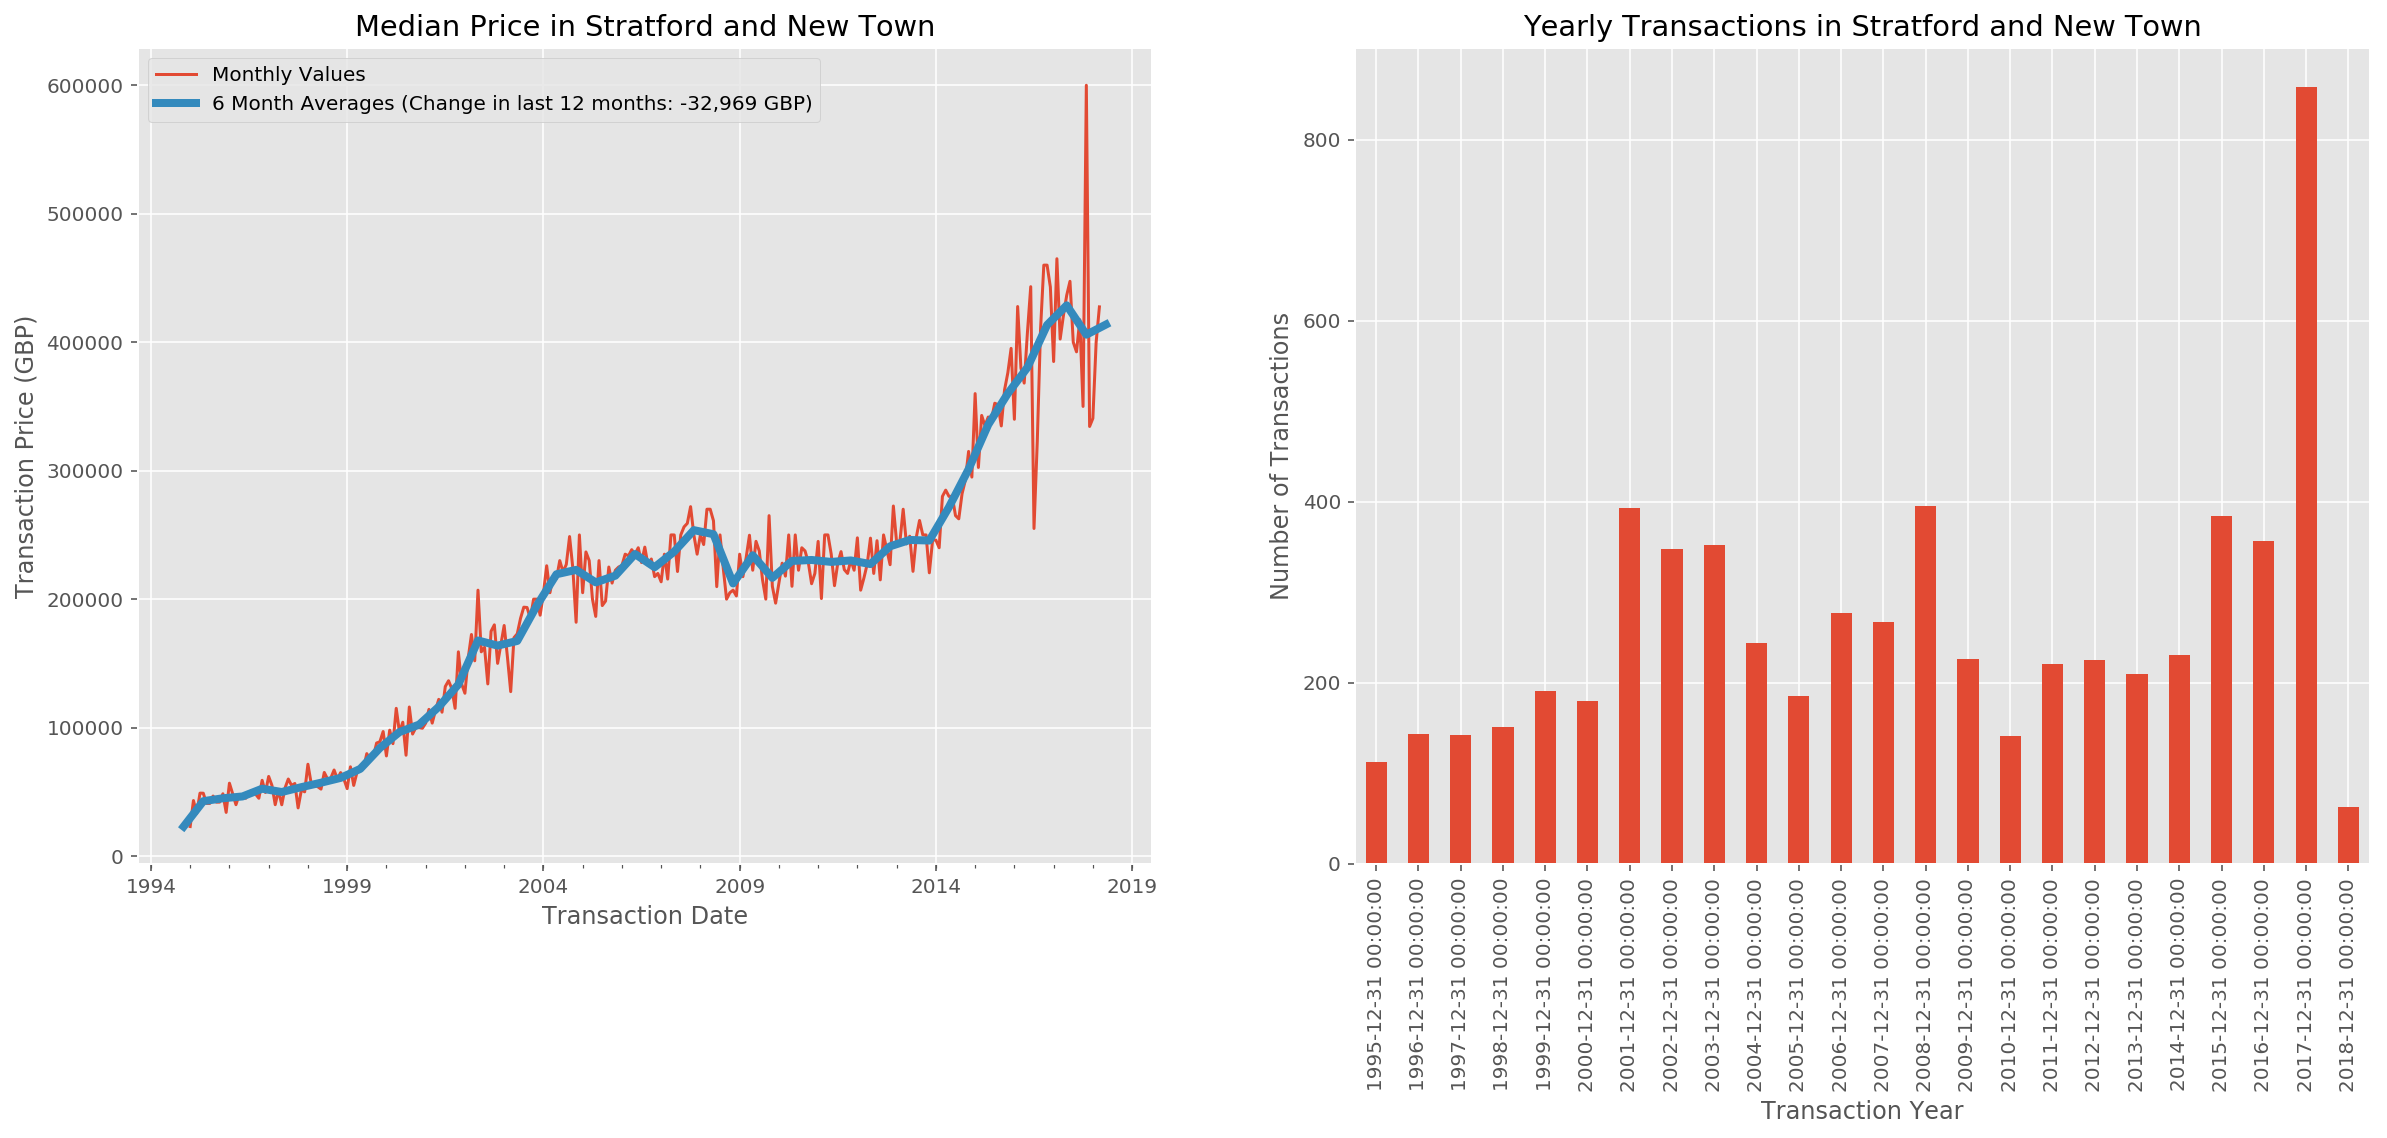

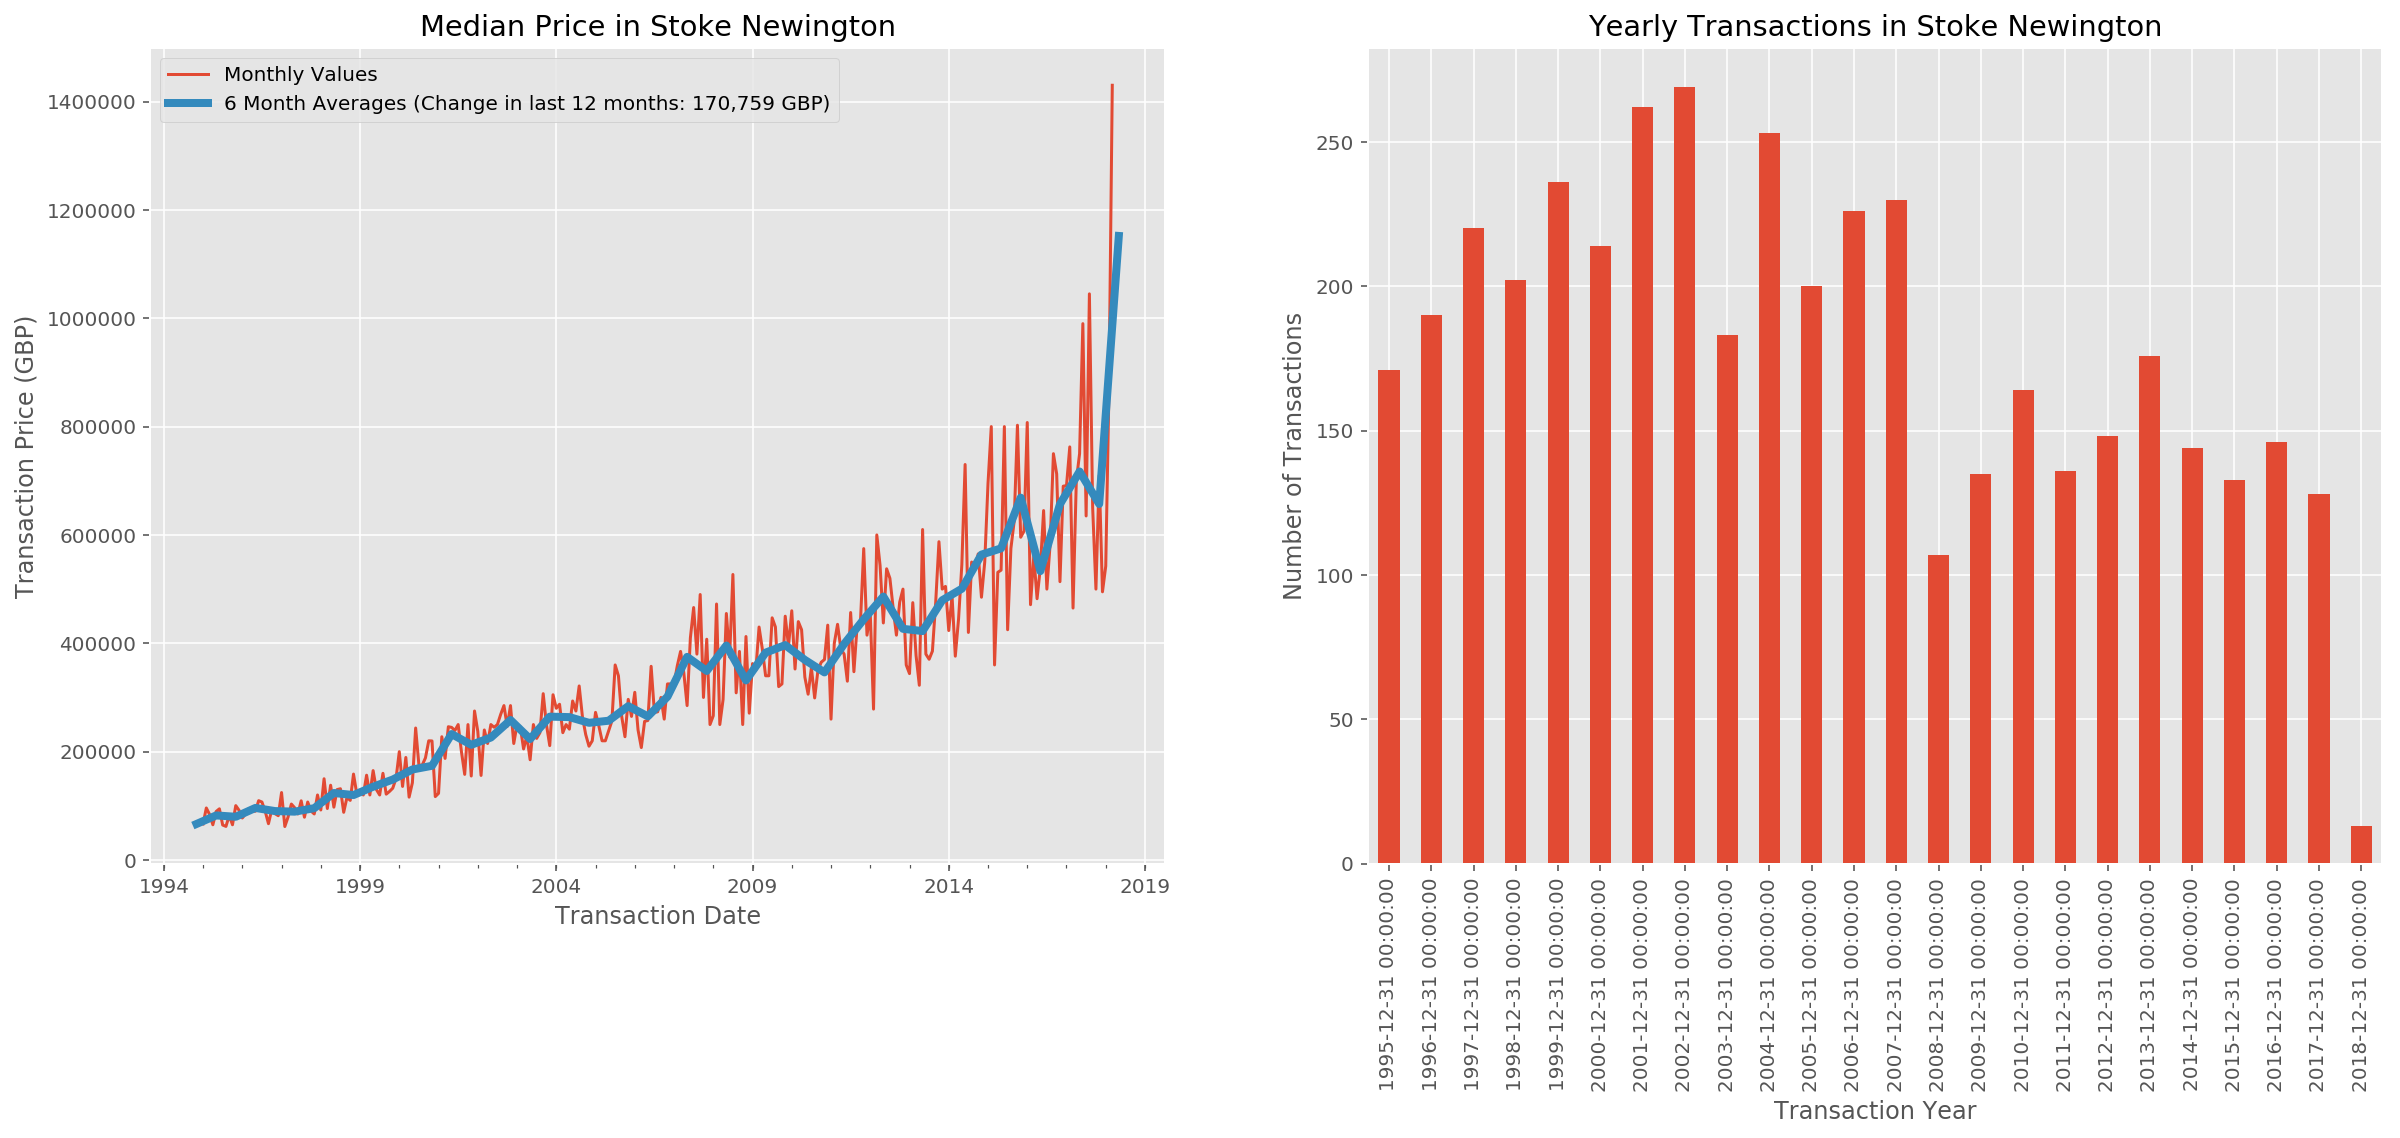

In [25]:
# london_wards = ['E05000{0:03d}'.format(n) for n in range(26, 650)]
# East Village (Stratford)


london_wards = wards[wards['WD17NM'].isin(['Crystal Palace', 'Holloway', 'Muswell Hill', 'Finsbury Park', 'Stoke Newington', 'Stratford and New Town'])].index.tolist()
for ward in london_wards:
    ward_name = wards.loc[ward]['WD17NM']
    ward_postcodes = postcode_locations[postcode_locations['ward'] == ward].index
    property_transactions_ward = property_transactions[property_transactions['property_postcode'].isin(ward_postcodes)]

    fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=2)
    
    monthly_prices_ward = property_transactions_ward.groupby(pd.Grouper(key='transaction_transfer_date', freq='M'))
    monthly_prices_ward_medians = monthly_prices_ward.agg({'transaction_price': ['median']})
    last_year = monthly_prices_ward_medians.loc['2017-04-30':'2018-03-31']
    last_year['days_since'] = (last_year.index - pd.to_datetime('2017-04-01')).astype('timedelta64[D]')
    last_year['transaction_price_median'] = last_year['transaction_price']['median']
    params = smf.ols('transaction_price_median ~ days_since', data=last_year).fit().params
    yearly_change = int(round(params['days_since']*365))
    
    monthly_prices_ward_medians.plot(title="Median Price in {ward}".format(ward=ward_name), ax=axes[0])
    monthly_prices_ward_medians.resample('6M').mean().plot(lw=4, ax=axes[0])
    axes[0].set_xlabel('Transaction Date')
    axes[0].set_ylabel('Transaction Price (GBP)')
    axes[0].legend(['Monthly Values', '6 Month Averages (Change in last 12 months: {yearly_change:,} GBP)'.format(yearly_change=yearly_change)])

    yearly_transactions_ward = property_transactions_ward.groupby(pd.Grouper(key='transaction_transfer_date', freq='Y'))
    yearly_transactions_ward_counts = yearly_transactions_ward.agg({'transaction_id': ['count']})

    yearly_transactions_ward_counts.plot.bar(title="Yearly Transactions in {ward}".format(ward=ward_name), ax=axes[1], legend=None)
    axes[1].set_xlabel('Transaction Year')
    axes[1].set_ylabel('Number of Transactions')
    fig.savefig('plots/{ward}'.format(ward=wards.loc[ward]['WD17NM']))

## TODO

Predict until 2020 using three models:

* Something simple like linear regression,
* Something more complex like ARIMA, and
* Something even more complex like an LSTM or Gaussian Process.

When we have these stats, augment the plot with dashed lines (rectangles) for predictions on future prices and sales numbers.

End with some descriptive stats about which neighbourhoods have been going up/down recently, and which neighbourhoods are expected to go up/down in the near future.

In [111]:
import datetime

import statsmodels.api as sm
import seaborn

In [79]:
parse_date = lambda x: (x.to_datetime() - datetime.datetime(1995, 1, 1)).days

In [90]:
x = monthly_prices_medians.index.map(parse_date).values

In [105]:
y = monthly_prices_medians.values.flatten()

In [106]:
model = sm.OLS(y, x).fit()

In [107]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     7881.
Date:                Thu, 10 May 2018   Prob (F-statistic):          4.91e-206
Time:                        23:31:39   Log-Likelihood:                -3256.2
No. Observations:                 279   AIC:                             6514.
Df Residuals:                     278   BIC:                             6518.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            30.7037      0.346     88.776      0.000      30.023      31.385
==============================================================================
Omnibus:                      258.312   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.781
Skew:                          -0.382   Prob(JB):                     2.52e-06
Kurtosis:                       1.722   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

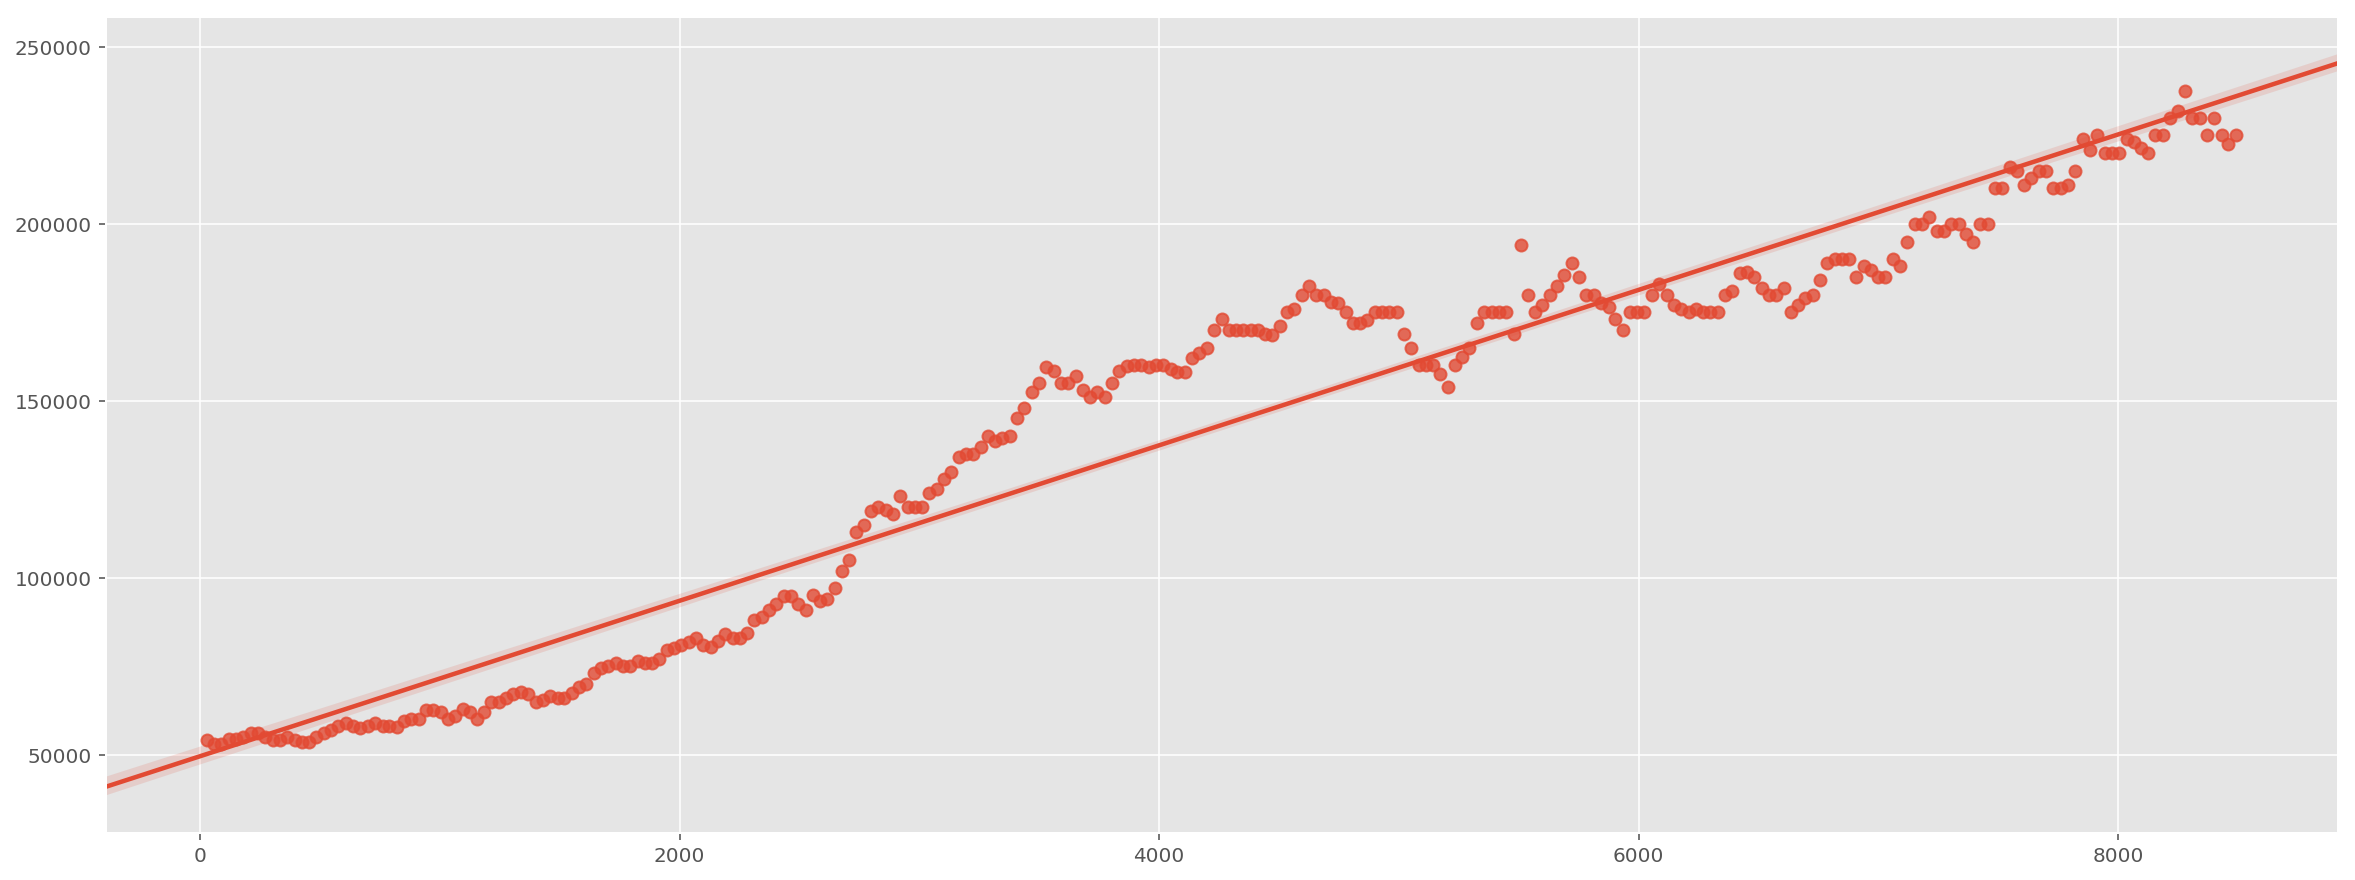

In [110]:
seaborn.regplot(x, y)